In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [70]:
#read data
df = pd.read_csv('marketing_campaign.csv', sep='\t', )#index_col=0
pd.set_option('display.max_columns', None)
df.head() #check if data is read successfully

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# **Data Analysis**

In [71]:
df.shape #shape of our dataset

(2240, 29)

In [72]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [73]:
#Check missing values 
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

we have some null values in Income columns, 24null values out of +2k, for our case dropping all lines having null income will not affect our model training (the objectif of tis hackathon)

In [74]:
#Drop null values
print(f'Before dropping {df.shape}')
df = df.dropna(subset=['Income'])
print(f'After dropping {df.shape}')

Before dropping (2240, 29)
After dropping (2216, 29)


In [75]:
#check datatypee
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

For Dt_Customers as we ve seen in df.head() its a date, but here the datatype is object, python/our computer will not understaand that its aa daate, they will handle it as object

In [76]:
#Casting to data
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [77]:
#Delete unecessary columns
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

"Z_CostContact" and "Z_Revenue" have same value in all the rows that's why they are not going to contribute anything in the model building. So we can drop them. 

In [78]:
#Drop Z_Revenue & Z_CostContct
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
df.shape #check if columns are droppped {should return (_,27)}

(2216, 27)

In [79]:
# Convertir toutes les valeurs de 'Marital_Status' en minuscules
df['Marital_Status'] = df['Marital_Status'].str.lower()

# Remplacer 'together' par 'married' et 'alone' par 'single'
df['Marital_Status'] = df['Marital_Status'].replace({'married': 'together', 'alone': 'single'})

# Supprimer les lignes avec 'absurd' ou 'yolo' dans 'Marital_Status'
df = df[~df['Marital_Status'].isin(['absurd', 'yolo'])]
df.shape

(2212, 27)

In [80]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [81]:
# Calculer l'âge des clients
df['Customer_Age'] = (pd.to_datetime('2014-01-01') - df['Dt_Customer']).dt.days // 365

# Calculer l'âge des clients (en années) à partir de 'Year_Birth'
df['Age'] = 2014 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,Age
0,5524,1957,Graduation,single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1,57
1,2174,1954,Graduation,single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,-1,60
2,4141,1965,Graduation,together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,49
3,6182,1984,Graduation,together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,-1,30
4,5324,1981,PhD,together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,-1,33


In [82]:
''' 
dff = df

# Create a pandas ExcelWriter object
with pd.ExcelWriter("marketing_campaing.xlsx", engine='xlsxwriter') as writer:
    # Write the DataFrame to the Excel file, with a sheet name that is a string (e.g., 'Marketing Data')
    dff.to_excel(writer, sheet_name='Marketing Data', index=False)
'''

' \ndff = df\n\n# Create a pandas ExcelWriter object\nwith pd.ExcelWriter("marketing_campaing.xlsx", engine=\'xlsxwriter\') as writer:\n    # Write the DataFrame to the Excel file, with a sheet name that is a string (e.g., \'Marketing Data\')\n    dff.to_excel(writer, sheet_name=\'Marketing Data\', index=False)\n'

# **Data Exploring**

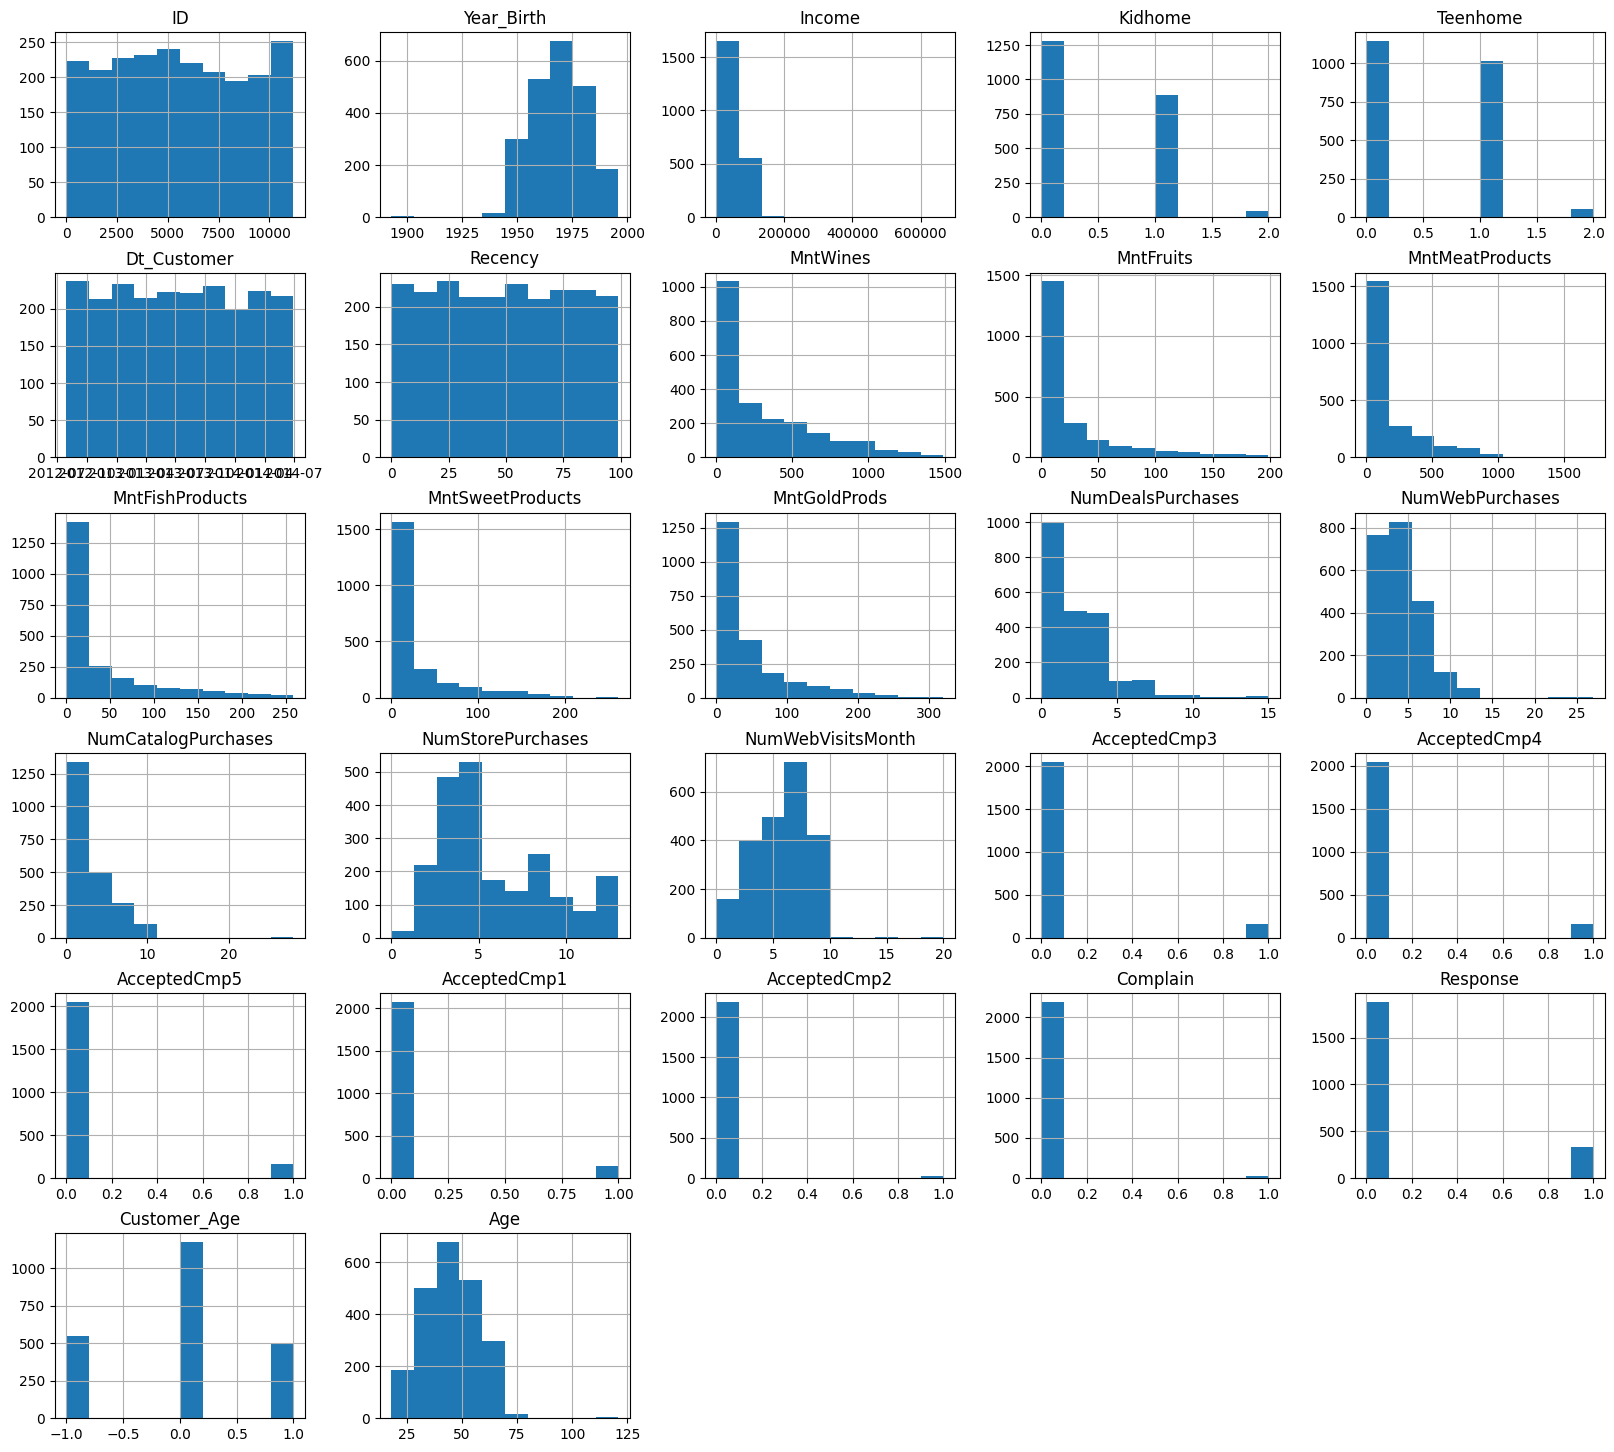

In [83]:
#Ditribution of variables
df.hist(figsize=(20, 18))
plt.show()

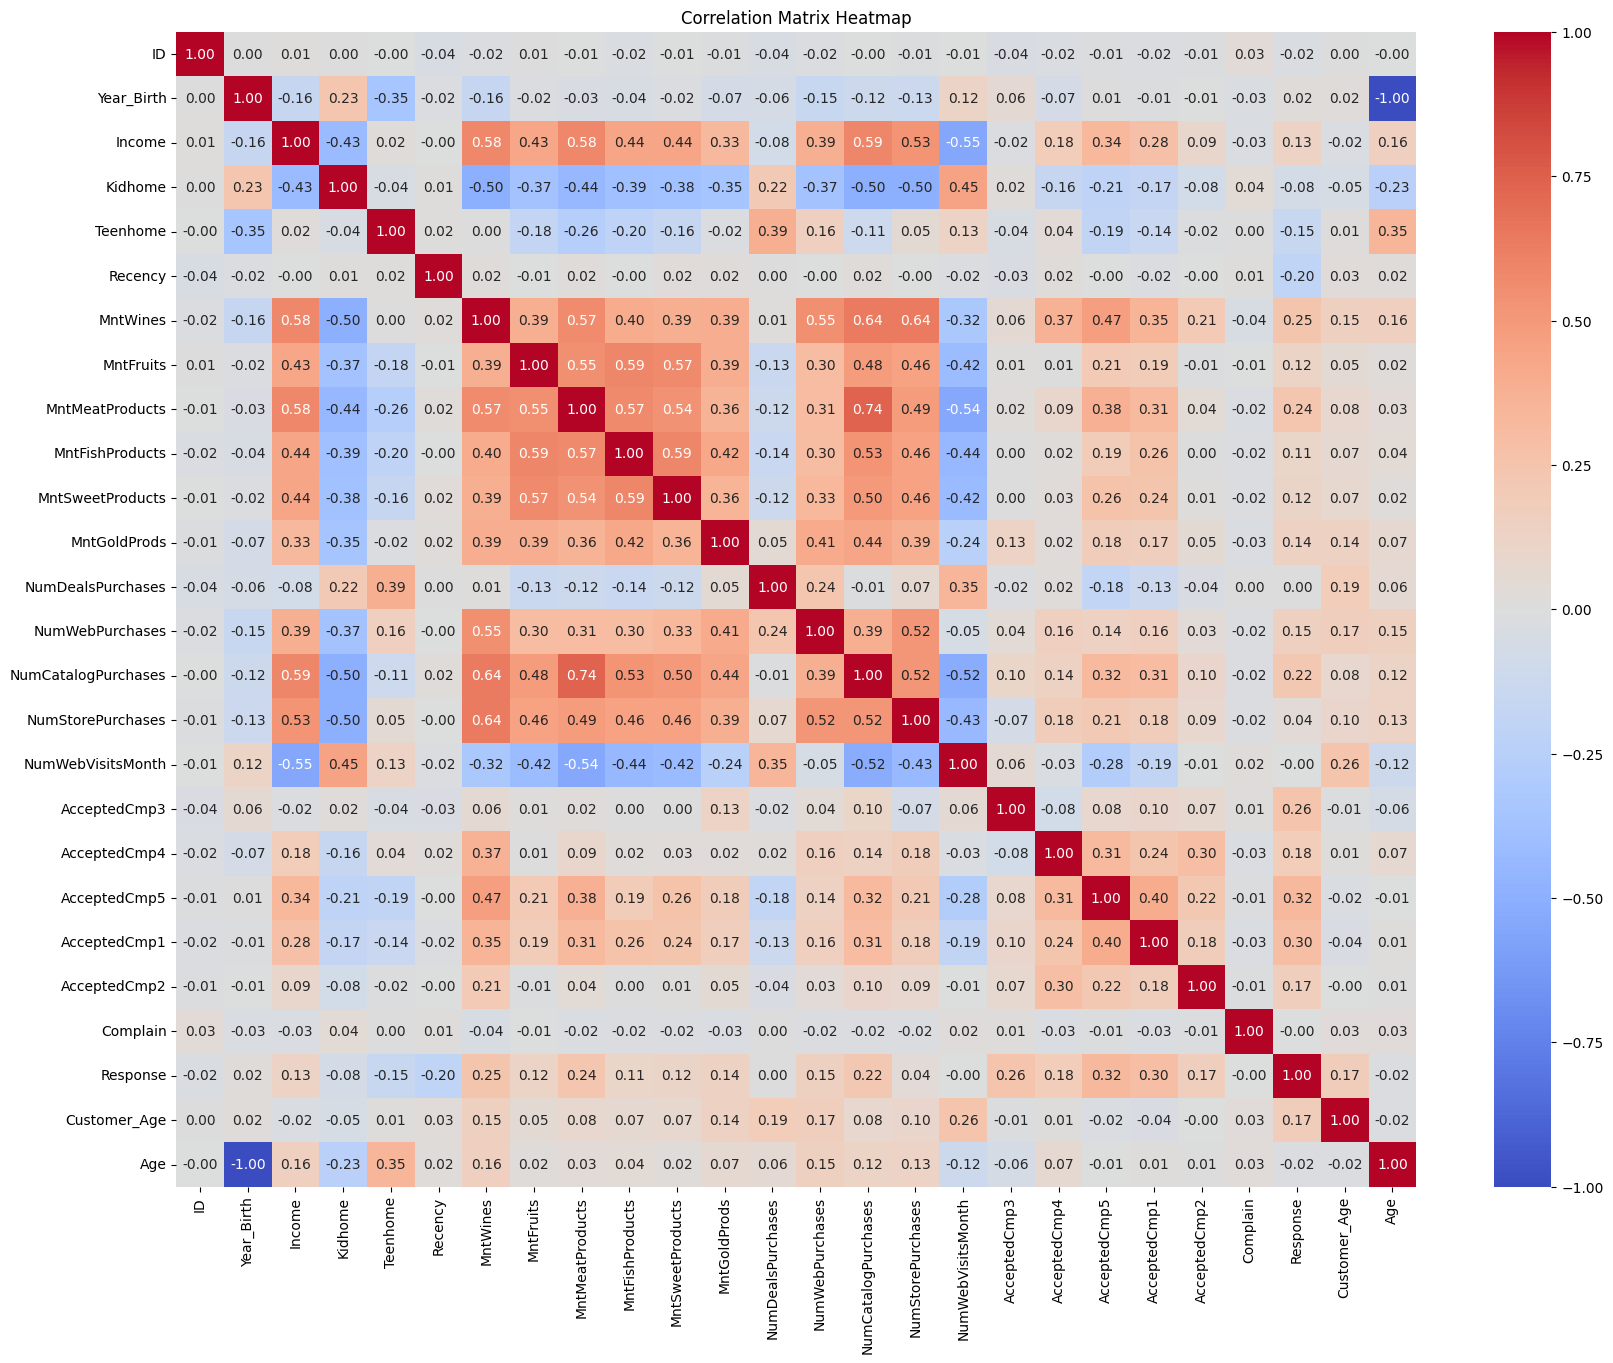

In [84]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [85]:
# Supprimer les colonnes inutiles
df = df.drop(columns=['ID', 'Complain','Year_Birth','Dt_Customer'])

In [86]:
# Liste des colonnes liées aux campagnes acceptées
accepted_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Créer la nouvelle colonne 'NumAcceptedCmp' qui est la somme des valeurs des colonnes de campagnes acceptées
df['NumAcceptedCmp'] = df[accepted_columns].sum(axis=1)

# **Descriptive statistics**

In [87]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Customer_Age,Age,NumAcceptedCmp
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.00000
mean,52232.510850,0.442586,0.505425,49.050633,305.030741,26.324593,166.970163,37.516275,27.047468,43.822333,2.321429,4.083183,2.668174,5.800181,5.320072,0.073689,0.074141,0.072785,0.063743,0.013562,0.149638,-0.026673,45.188969,0.29792
std,25187.455359,0.537052,0.544258,28.940794,337.611255,39.781794,224.344950,54.558673,41.092454,51.623472,1.923511,2.741930,2.924378,3.253616,2.423445,0.261323,0.262060,0.259842,0.244350,0.115691,0.356797,0.685650,11.982065,0.67877
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,18.000000,0.00000
25%,35233.500000,0.000000,0.000000,24.000000,23.750000,1.750000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.00000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.00000
75%,68522.000000,1.000000,1.000000,74.000000,505.500000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,0.00000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000,4.00000


<Axes: ylabel='Income'>

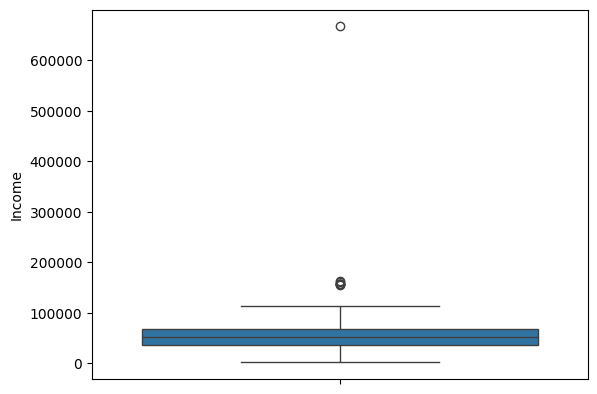

In [88]:
#Detect & remove outliers
'''
As we see for income, there is a big diff between Q3 and max, so it might be outliers vlaues  

'''
sns.boxplot(df['Income'])

In [89]:
#Remove the outliers:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Before outliers remove {df.shape}')
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]
print(f'After outliers remove {df.shape}')

Before outliers remove (2212, 26)
After outliers remove (2204, 26)


<Axes: ylabel='Income'>

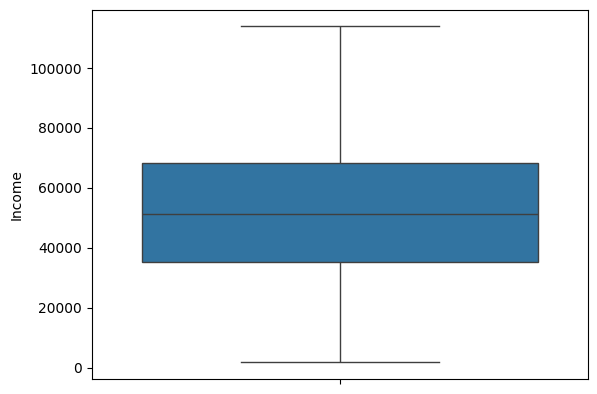

In [90]:
sns.boxplot(df['Income'])


Model Training

In [91]:
# Encodage de la colonne 'Marital_Status' avec LabelEncoder
#0 représente "single" (célibataire),1 représente "married" (marié),2 représente"divorced" (divorcé),3 représente "widowed" (veuf ou veuve).
label_encoder = LabelEncoder()
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['Education'] = label_encoder.fit_transform(df['Education'])

In [92]:
# Liste des colonnes numériques à standardiser
columns_to_standardize = ['Income', 'Age','Customer_Age','NumWebVisitsMonth','NumStorePurchases','NumCatalogPurchases','NumWebPurchases','MntWines', 'MntMeatProducts', 'MntGoldProds','MntSweetProducts','NumDealsPurchases','MntFishProducts','MntFruits','Recency','Education','Marital_Status']

# Initialisation du standard scaler
scaler = StandardScaler()

# Appliquer la standardisation sur les colonnes spécifiées
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [93]:
# Liste des colonnes que vous voulez utiliser pour le modèle
selected_columns = ['MntWines', 'Income', 'MntGoldProds','Customer_Age', 'Recency','NumAcceptedCmp','MntMeatProducts']

# Sélectionner uniquement ces colonnes dans X
X = df[selected_columns]
y = df['Response']  # La colonne cible 'Response'

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)




# Créer le modèle Random Forest avec des paramètres ajustés
rf = RandomForestClassifier(
    n_estimators=200,        # 200 arbres dans la forêt
    max_depth=15,            # Limiter la profondeur des arbres
    min_samples_split=14,    # Minimum d'échantillons requis pour diviser un nœud
    min_samples_leaf=8,      # Minimum d'échantillons dans une feuille
    max_features='sqrt',    # Utiliser la racine carrée du nombre de caractéristiques
    random_state=42,         # Garantir la reproductibilité
    bootstrap=False,          # Utiliser un échantillonnage avec remplacement
    criterion='gini',    # Utiliser l'entropie comme critère de division

 
)

# Entraîner le modèle avec les données d'entraînement
rf.fit(X_train, y_train)


# Prédire les résultats sur l'ensemble de test
y_pred = rf.predict(X_test)

# Évaluer la performance du modèle
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))

# Extraire les résultats du classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extraire les métriques pour les classes 0 et 1
precision_class_0 = report['0']['precision']
precision_class_1 = report['1']['precision']

recall_class_0 = report['0']['recall']
recall_class_1 = report['1']['recall']

f1_class_0 = report['0']['f1-score']
f1_class_1 = report['1']['f1-score']

# Calculer la moyenne des métriques
avg_precision = np.mean([precision_class_0, precision_class_1])
avg_recall = np.mean([recall_class_0, recall_class_1])
avg_f1 = np.mean([f1_class_0, f1_class_1])

# Afficher les moyennes
print(f"\nMoyenne des métriques (précision, rappel, f1-score) pour les classes 0 et 1:")
print(f"Précision moyenne: {avg_precision:.4f}")
print(f"Rappel moyen: {avg_recall:.4f}")
print(f"F1-score moyen: {avg_f1:.4f}")

Accuracy: 0.9025
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       379
           1       0.77      0.44      0.56        62

    accuracy                           0.90       441
   macro avg       0.84      0.71      0.75       441
weighted avg       0.89      0.90      0.89       441


Moyenne des métriques (précision, rappel, f1-score) pour les classes 0 et 1:
Précision moyenne: 0.8426
Rappel moyen: 0.7072
F1-score moyen: 0.7510


In [95]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')  # Save model

['random_forest_model.pkl']

In [96]:

# Sélection des colonnes spécifiques
selected_columns = [
    'Recency', 
    'NumStorePurchases', 
    'Customer_Age', 
    'Teenhome', 
    'MntMeatProducts', 
    'NumAcceptedCmp', 
    'Education', 
    'AcceptedCmp3'
]

# Créer X avec ces colonnes spécifiques
X_selected = df[selected_columns]

# Créer y (cible) à partir de la colonne 'Response'
y = df['Response']

# Diviser en ensemble d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Créer le modèle de régression logistique
logreg = LogisticRegression(
    max_iter=1000,  # Nombre maximum d'itérations pour la convergence
    random_state=42  # Garantir la reproductibilité
)

# Entraîner le modèle avec les données d'entraînement
logreg.fit(X_train, y_train)

# Prédire les résultats sur l'ensemble de test
y_pred_logreg = logreg.predict(X_test)

# Évaluer la performance du modèle
print(f'Accuracy (Logistic Regression): {accuracy_score(y_test, y_pred_logreg):.4f}')
print(classification_report(y_test, y_pred_logreg))

# Extraire les résultats du classification report
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)

# Extraire les métriques pour les classes 0 et 1
precision_class_0_logreg = report_logreg['0']['precision']
precision_class_1_logreg = report_logreg['1']['precision']

recall_class_0_logreg = report_logreg['0']['recall']
recall_class_1_logreg = report_logreg['1']['recall']

f1_class_0_logreg = report_logreg['0']['f1-score']
f1_class_1_logreg = report_logreg['1']['f1-score']

# Calculer la moyenne des métriques
avg_precision_logreg = np.mean([precision_class_0_logreg, precision_class_1_logreg])
avg_recall_logreg = np.mean([recall_class_0_logreg, recall_class_1_logreg])
avg_f1_logreg = np.mean([f1_class_0_logreg, f1_class_1_logreg])

# Afficher les moyennes
print(f"\nMoyenne des métriques (précision, rappel, f1-score) pour les classes 0 et 1 (Régression Logistique):")
print(f"Précision moyenne: {avg_precision_logreg:.4f}")
print(f"Rappel moyen: {avg_recall_logreg:.4f}")
print(f"F1-score moyen: {avg_f1_logreg:.4f}")


Accuracy (Logistic Regression): 0.8821
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       370
           1       0.81      0.35      0.49        71

    accuracy                           0.88       441
   macro avg       0.85      0.67      0.71       441
weighted avg       0.87      0.88      0.86       441


Moyenne des métriques (précision, rappel, f1-score) pour les classes 0 et 1 (Régression Logistique):
Précision moyenne: 0.8471
Rappel moyen: 0.6679
F1-score moyen: 0.7118


In [98]:
import joblib
joblib.dump(logreg, 'logistic_regression_model.pkl')  # Save model

['logistic_regression_model.pkl']

In [102]:


# Sélection des colonnes spécifiques
selected_columns_svm = [
    'Recency', 
    'NumStorePurchases', 
    'Customer_Age', 
    'Teenhome', 
    'MntMeatProducts', 
    'NumAcceptedCmp'
]

# Créer X avec ces colonnes spécifiques
X_selected_svm = df[selected_columns_svm]

# Créer y (cible) à partir de la colonne 'Response'
y = df['Response']

# Diviser en ensemble d'entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(X_selected_svm, y, test_size=0.2, random_state=42)

# Créer le modèle SVM avec noyau linéaire
svm = SVC(kernel='linear', random_state=42)

# Entraîner le modèle avec les données d'entraînement
svm.fit(X_train, y_train)

# Prédire les résultats sur l'ensemble de test
y_pred_svm = svm.predict(X_test)

# Évaluer la performance du modèle
print(f'Accuracy (SVM): {accuracy_score(y_test, y_pred_svm):.4f}')
print(classification_report(y_test, y_pred_svm))

# Extraire les résultats du classification report
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Extraire les métriques pour les classes 0 et 1
precision_class_0_svm = report_svm['0']['precision']
precision_class_1_svm = report_svm['1']['precision']

recall_class_0_svm = report_svm['0']['recall']
recall_class_1_svm = report_svm['1']['recall']

f1_class_0_svm = report_svm['0']['f1-score']
f1_class_1_svm = report_svm['1']['f1-score']

# Calculer la moyenne des métriques
avg_precision_svm = np.mean([precision_class_0_svm, precision_class_1_svm])
avg_recall_svm = np.mean([recall_class_0_svm, recall_class_1_svm])
avg_f1_svm = np.mean([f1_class_0_svm, f1_class_1_svm])

# Afficher les moyennes
print(f"\nMoyenne des métriques (précision, rappel, f1-score) pour les classes 0 et 1 (SVM):")
print(f"Précision moyenne: {avg_precision_svm:.4f}")
print(f"Rappel moyen: {avg_recall_svm:.4f}")
print(f"F1-score moyen: {avg_f1_svm:.4f}")


Accuracy (SVM): 0.8776
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       370
           1       0.84      0.30      0.44        71

    accuracy                           0.88       441
   macro avg       0.86      0.64      0.68       441
weighted avg       0.87      0.88      0.85       441


Moyenne des métriques (précision, rappel, f1-score) pour les classes 0 et 1 (SVM):
Précision moyenne: 0.8599
Rappel moyen: 0.6425
F1-score moyen: 0.6844
